In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Acquire training and testing data**

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

**Helper Function**

In [3]:
#df - the dataframe on which to apply the analysis
#factor - the factor / column for which we want the survival rate. Should be of type string.
#This function takes in a column and returns the survival rate of Titanic passengers according to this factor.

survivor_count = train_df['Survived'].sum()    
def get_survival_rate(dataframe, factor):
  
    by_factor = dataframe.groupby(factor)
    count_by_factor = by_factor['Survived'].sum()
    survival_rate = count_by_factor / survivor_count * 100
    print('Survival precentage:', survival_rate, '\n')
    print('Survival Count: ', count_by_factor,'\n')
    

**Wrangle, prepare, cleanse the data**

In [4]:
#drop unused columns
train_df.drop(labels=["Ticket","Cabin","PassengerId"], axis='columns', inplace=True)
test_df.drop(labels=["Ticket","Cabin","PassengerId"], axis='columns', inplace=True)


In [5]:
#Fill NaN values of Age to mean
train_df['Age'].fillna(train_df.describe().loc['mean','Age'], inplace=True)
test_df['Age'].fillna(test_df.describe().loc['mean','Age'], inplace=True)

#Fill NaN values of embarked with the most common value - S
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = train_df['Embarked'].fillna('S')

#Fill NaN values of Fare with mean
train_df['Fare'] = train_df['Fare'].replace(['0'],['Null'])
test_df['Fare'] = test_df['Fare'].replace(['0'],['Null'])

train_df['Fare'].fillna(train_df.describe().loc['mean','Fare'], inplace=True)
test_df['Fare'].fillna(test_df.describe().loc['mean','Fare'], inplace=True)

In [6]:
# Create new column Family Size

# Family Size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [7]:
#Create new column - Title

train_df['Title'] = train_df['Name'].str.findall(r' (\w+)\.')
train_df['Title'] = train_df['Title'].str[0]

test_df['Title'] = test_df['Name'].str.findall(r' (\w+)\.')
test_df['Title'] = test_df['Title'].str[0]

#print(train_df.Title.unique())
#print(test_df.Title.unique())

uncommon = ['Lady', 'Countess','Capt', 
            'Col','Don', 'Dr', 'Major', 
            'Rev', 'Sir', 'Jonkheer', 'Dona']

title_dictionary = {'Mr': 1, 'Mrs': 2, 'Miss': 3, 
                   'Master': 4, 'Uncommon': 5}

train_df['Title'] = train_df['Title'].replace(uncommon, 'Uncommon')
train_df['Title'] = train_df['Title'].replace(['Ms', 'Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].map(title_dictionary)
train_df['Title'] = train_df['Title'].fillna(0)

test_df['Title'] = test_df['Title'].replace(uncommon, 'Uncommon')
test_df['Title'] = test_df['Title'].replace(['Ms', 'Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].map(title_dictionary)
test_df['Title'] = test_df['Title'].fillna(0)

In [8]:
#convert sex values to numerical: male = 0, female = 1
train_df['Sex'] = train_df['Sex'].replace(['male','female'],[0,1])
test_df['Sex'] = test_df['Sex'].replace(['male','female'],[0,1])

#convert Embarked values to numerical: 0 = C = Cherbourg, 1 = Q = Queenstown, 2 = S = Southampton
train_df['Embarked'] = train_df['Embarked'].replace(['C','Q','S'],[0,1,2])
test_df['Embarked'] = test_df['Embarked'].replace(['C','Q','S'],[0,1,2])

#convert age values to numerical  by range: 0 = (0-18) , 1 = (18-30), 2 = (30-50), 3= (50-65), 4 =(65+) 
age_groups = [0, 18, 30, 50, 65, 120]
age_group_names = ['0', '1',  '2', '3', '4']
train_df['Age group'] = pd.cut(train_df['Age'], bins=age_groups, labels=age_group_names)
test_df['Age group'] = pd.cut(train_df['Age'], bins=age_groups, labels=age_group_names)
train_df["Age group"] = pd.to_numeric(train_df["Age group"])
test_df["Age group"] = pd.to_numeric(test_df["Age group"])

#convert fare values to numerical: 0 = (0-20) , 1 = (20-40), 2 = (40-60), 3= (60-80), 4 =(80+) 
fare_groups = [-1, 20, 40, 60, 80, 1000]
fare_group_names = ['0', '1',  '2', '3', '4']
train_df['Fare group'] = pd.cut(train_df['Fare'], bins=fare_groups, labels=fare_group_names)
test_df['Fare group'] = pd.cut(train_df['Fare'], bins=fare_groups, labels=fare_group_names)
train_df["Fare group"] = pd.to_numeric(train_df["Fare group"])
test_df["Fare group"] = pd.to_numeric(test_df["Fare group"])

#drop age and name columns
train_df.drop(labels=["Age","Name","Fare"], axis='columns', inplace=True)
test_df.drop(labels=["Age","Name","Fare"], axis='columns', inplace=True)

In [9]:
#check data before analysis

print(train_df.info())
print(test_df.info())

#train_df.head(20)
#test_df.head(10)

#display rows with NaN values
train_df[train_df.isnull().any(axis=1)]
test_df[test_df.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   SibSp       891 non-null    int64
 4   Parch       891 non-null    int64
 5   Embarked    891 non-null    int64
 6   FamilySize  891 non-null    int64
 7   Title       891 non-null    int64
 8   Age group   891 non-null    int64
 9   Fare group  891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   Sex         418 non-null    int64
 2   SibSp       418 non-null    int64
 3   Parch       418 non-null    int64
 4   Embarked    418 non-null    int64
 5   

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age group,Fare group


**Analyze, identify patterns, and explore the data**

In [10]:
#show the correlation of Class, Sex, Age Group, Embarked location and Title to Survival - Data

get_survival_rate(train_df, 'Pclass')
print("Total count of people by Class\n")
print(train_df['Pclass'].value_counts())
print("\n")

#get_survival_rate(train_df, 'Sex')
#print("Total count of people by Sex\n")
#print(train_df['Sex'].value_counts())
#print("\n")

#get_survival_rate(train_df, 'Age group')
#print("Total count of people by Age group\n")
#print(train_df['Age group'].value_counts())
#print("\n")

#get_survival_rate(train_df, 'Embarked')
#print("Total count of people by Embarked\n")
#print(train_df['Embarked'].value_counts())
#print("\n")

#get_survival_rate(train_df, 'Title')
#print("Total count of people by Title\n")
#print(train_df['Title'].value_counts())
#print("\n")

Survival precentage: Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64 

Survival Count:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64 

Total count of people by Class

3    491
1    216
2    184
Name: Pclass, dtype: int64




Text(0.5, 1.0, 'survival Probabily by Class')

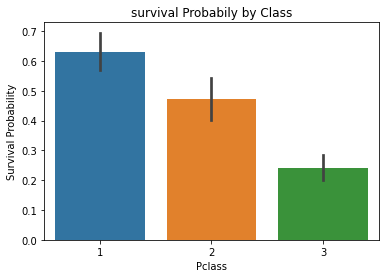

In [11]:
#Show the correlation of Class to Survival - Graph

sns.barplot(x='Pclass',y='Survived', data=train_df)
plt.ylabel('Survival Probability')
plt.title('survival Probabily by Class')

Text(0.5, 1.0, 'survival Probabily by Sex')

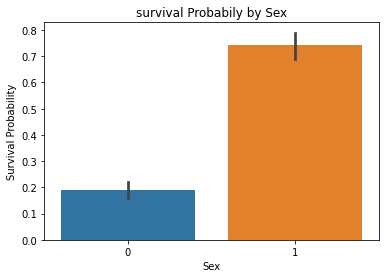

In [12]:
#Show the correlation of Sex to Survival - Graph

sns.barplot(x='Sex',y='Survived', data=train_df)
plt.ylabel('Survival Probability')
plt.title('survival Probabily by Sex')

Text(0.5, 1.0, 'survival Probabily by Age Group')

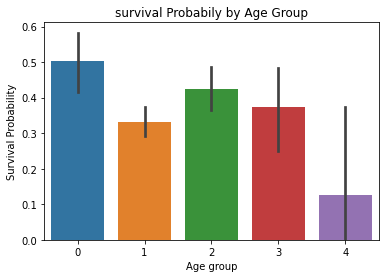

In [13]:
#Show the correlation of Age group to Survival - Graph

sns.barplot(x='Age group',y='Survived', data=train_df)
plt.ylabel('Survival Probability')
plt.title('survival Probabily by Age Group')

Text(0.5, 1.0, 'survival Probabily by Embarked Location')

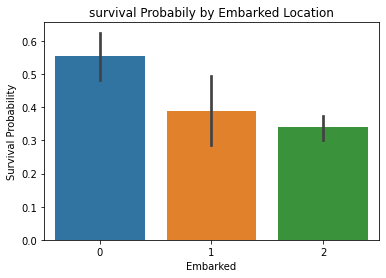

In [14]:
#Show the correlation of Embarked Location to Survival - Graph

sns.barplot(x='Embarked',y='Survived', data=train_df)
plt.ylabel('Survival Probability')
plt.title('survival Probabily by Embarked Location')

Text(0.5, 1.0, 'survival Probabily by Title')

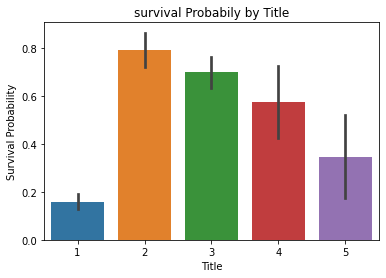

In [15]:
#Show the correlation of Title to Survival - Graph

sns.barplot(x='Title',y='Survived', data=train_df)
plt.ylabel('Survival Probability')
plt.title('survival Probabily by Title')

**Model, predict, and solve the problem**

In [16]:
#LogisticRegression
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


80.25

In [17]:
#random_forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100,2)
acc_random_forest

89.0